In [2]:
!pip install -U fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
!pip install -U duckduckgo-search fastcore

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.4 MB/s eta 0:00:00
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.7.29
    Uninstalling fastcore-1.7.29:
      Successfully uninstalled fastcore-1.7.29
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires fastcore<1.8,>=1.5.29, but you have fastcore 1.8.1 which is incompatible.


In [4]:
!pip install -U fastcore fastai fastdownload

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.8.1
    Uninstalling fastcore-1.8.1:
      Successfully uninstalled fastcore-1.8.1


In [5]:
# Function to search and return image URLs
def search_images(keywords, max_images=200):
    with DDGS() as ddgs:
        results = ddgs.images(keywords, max_results=max_images)
        return L(results).itemgot('image')  # Extract only the image URLs

Found image URL: https://www.autocar.co.uk/sites/autocar.co.uk/files/images/car-reviews/first-drives/legacy/87-winkelmann-lamborghini-future-interview-aventador-render.jpg


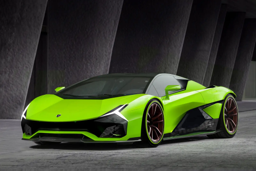

In [8]:

# Imports
from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from PIL import Image

# Search function to get image URLs
def search_images(keywords, max_images=1):
    with DDGS() as ddgs:
        results = ddgs.images(keywords, max_results=max_images)
        return L(results).itemgot('image')

# Get a car image
new_cars_urls = search_images("new_car", max_images=1)
print(f"Found image URL: {new_cars_urls[0]}")

# Download the image
new_cars_dest = 'new_cars.jpg'
download_url(new_cars_urls[0], new_cars_dest, show_progress=False)

# Open and preview the image
im_car = Image.open(new_cars_dest)
im_car.to_thumb(256, 256)



Found image URL: https://c8.alamy.com/comp/2A6X6GJ/crashed-car-with-collapsed-roof-2A6X6GJ.jpg


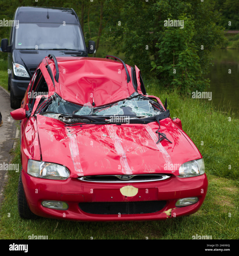

In [10]:
#Get Damaged car image
damaged_cars_url = search_images("damaged_car", max_images = 1)
print(f"Found image URL: {damaged_cars_url[0]}")

#Download the image
damaged_cars_dest = 'damaged_car.jpg'
download_url(damaged_cars_url[0], damaged_cars_dest, show_progress = False)

#Open and preview the image
im_damaged_car = Image.open(damaged_cars_dest)
im_damaged_car.to_thumb(256, 256)

In [16]:
searches = 'new_car','damaged_cars'
path = Path('new_or_damaged_car')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    urls = search_images(f'{o} photo', max_images= 60)
    download_images(dest, urls=urls)
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

In [24]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

4

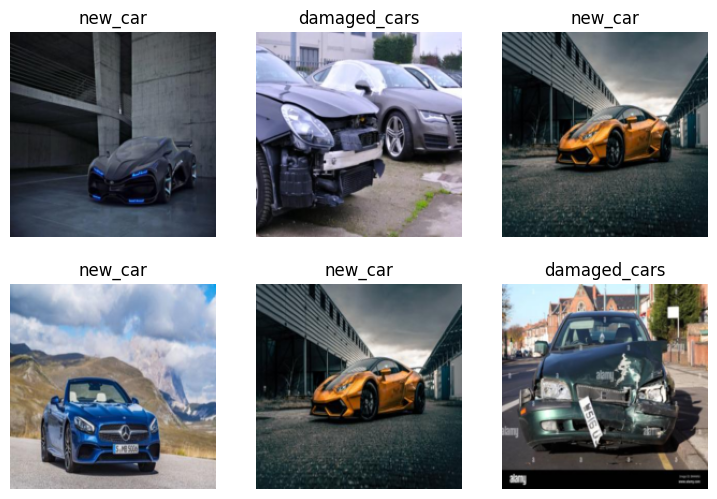

In [26]:
# Imports
from fastai.vision.all import *
from pathlib import Path

# Path to your dataset (change if needed)
path = Path('new_or_damaged_car')

# Data loading
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),                # Images and labels
    get_items=get_image_files,                         # Get all image files
    splitter=RandomSplitter(valid_pct=0.2, seed=42),   # Train/validation split
    get_y=parent_label,                                # Label = parent folder name
    item_tfms=[Resize(192, method='squish')]           # Resize images to 192x192
).dataloaders(path, bs=10)                             # Batch size = 32

# Show some training images
dls.show_batch(max_n=6)

In [27]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)


epoch,train_loss,valid_loss,error_rate,time
0,0.797816,0.402468,0.125000,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.133064,0.168714,0.062500,00:28
1,0.243672,0.349981,0.156250,00:26
2,0.174059,0.374828,0.156250,00:25


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79a9b8b404a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x79a9b8b404a0>
Traceback (most recent call last):
if w.is_alive():  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    
self._shutdown_workers()
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
     if w.is_alive():
          ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
             ^^^^^^^^^^^^^^^^^^^^^^^^^

In [33]:
is_damaged_car,_,probs = learn.predict(PILImage.create('car1.jpg'))
print(f'This is a {is_damaged_car}')
print(f"The probability that this is a damaged_car is :{probs[0]:.4f}")

This is a damaged_cars
The probability that this is a damaged_car is :0.9949
